In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd

load_dotenv

connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
print("Starting the connection...")
engine = create_engine(connection_string, isolation_level="AUTOCOMMIT")
engine.connect()
print("Connected successfully!")

if engine is None:
    exit()
engine

Starting the connection...


OperationalError: (psycopg2.OperationalError) could not translate host name "None" to address: Name or service not known

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [1]:
#importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargar df
df = pd.read_csv('data/raw/heart_attack_prediction_indonesia.csv' , sep = ',')

In [3]:
print(df.shape)
df.head()

(158355, 28)


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

Descripcion de las columnas:

 0   age -                          edad

 1   gender -                        genero (masculino o femenino)

 2   region -                        urbano o rural

 3   income_level -                  nivel de ingresos (bajo, medio, alto)

 4   hypertension -                  padece de impertension (si o no)

 5   diabetes -                      padece de diabetes (si o no)

 6   cholesterol_level -             nivel de colesterol

 7   obesity -                       padece de obesidad (si o no)

 8   waist_circumference -           circunferencia de la cintura

 9   family_history -                Familia con problemas cardiacos (si o no)

 10  smoking_status -                Sí fumó, fuma, o nunca fumó

 11  alcohol_consumption -           Nivel de Consumo de alcohol (nada, moderado, alto)
     
 12  physical_activity -            Nivel de actividad fisica (baja, moderada, alta)

 13  dietary_habits -                Habitos Alimenticios (saludables o no saludables)

 14  air_pollution_exposure -        Nivel de Exposición a la contaminación del aire  (Ninguno, moderado, alto)

 15  stress_level -                  Nivel de Estrés (bajo, medio, alto)

 16  sleep_hours -                   Horas que duerme

 17  blood_pressure_systolic -       Presión arterial sistólica

 18  blood_pressure_diastolic -      Presión arterial diastólica

 19  fasting_blood_sugar -           Azúcar en sangre en ayunas

 20  cholesterol_hdl -               Nivel de colesterol hdl 'bueno'

 21  cholesterol_ldl -               Nivel de colesterol 'malo'

 22  triglycerides -                 Nivel de triglicéridos

 23  EKG_results -                   Resultados del ECG  (normal / anormal)

 24  previous_heart_disease -        Problemas del corazón anteriormente (si o no)

 25  medication_usage -              Medicacion (si o no)

 26  participated_in_free_screening - indica si una persona participó en una campaña de detección gratuita de salud (si o no)

 27  heart_attack -                  Ataque al corazón (si o no)


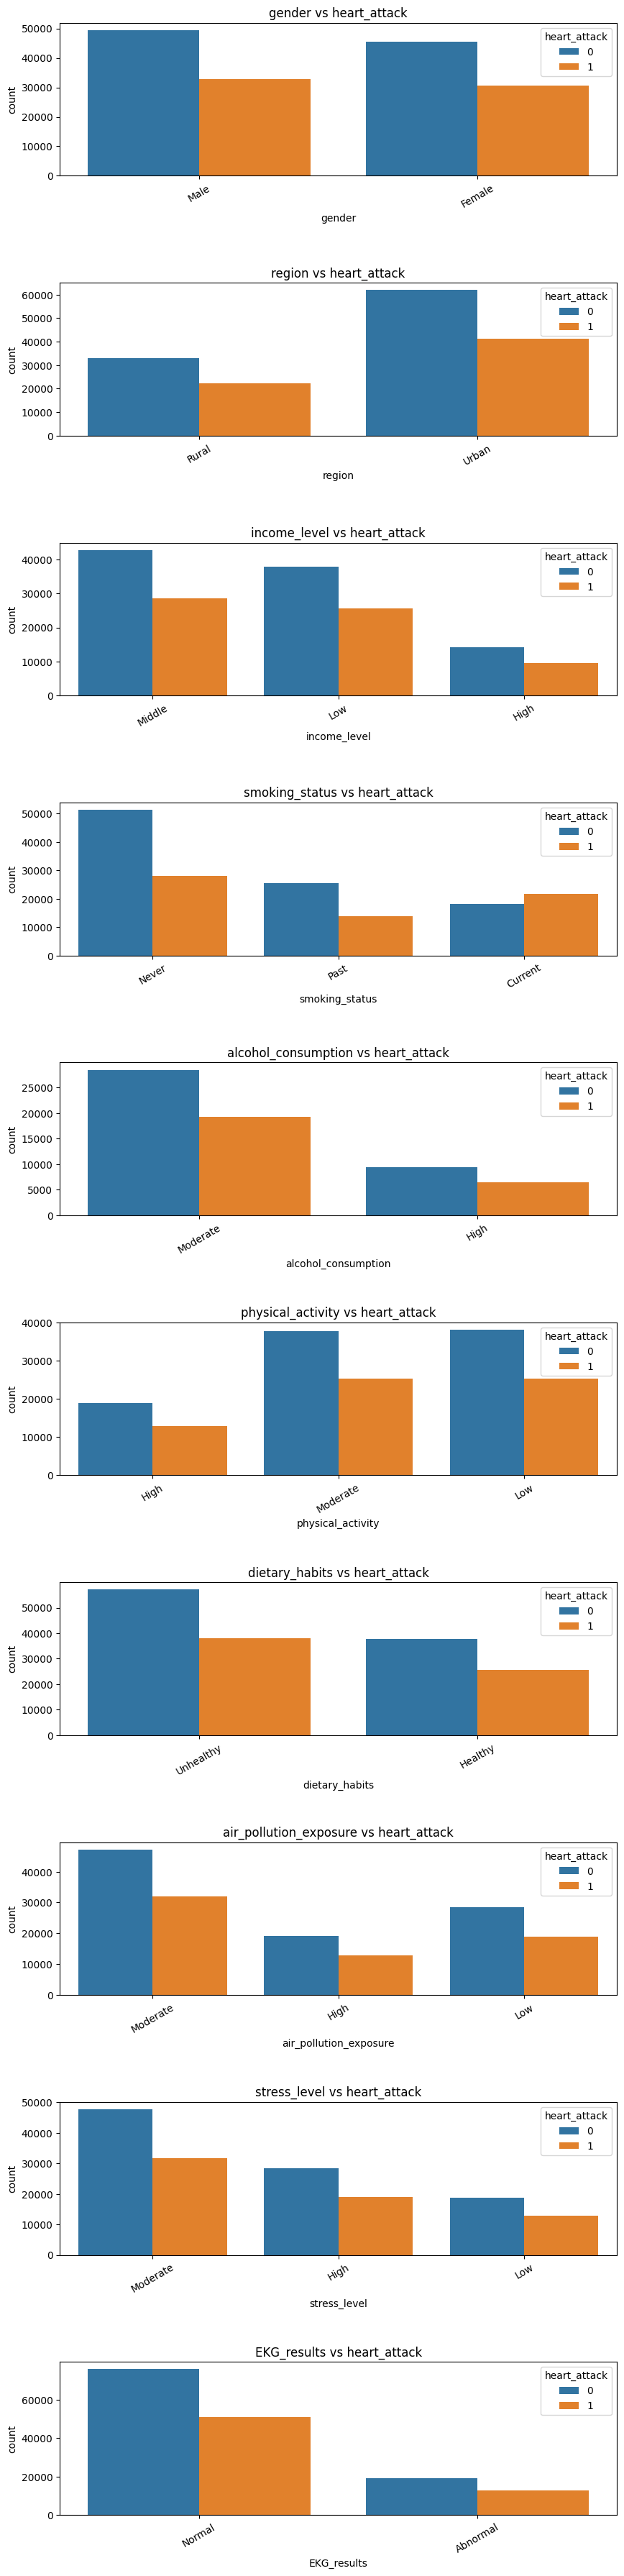

In [19]:
#Tomamos las variables categoricas y generamos graficos de barras

col_cat = ['gender','region' ,'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure' , 'stress_level', 'EKG_results']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(col_cat):
    sns.countplot(data=df, x=col, hue='heart_attack', ax=ax[i])
    ax[i].set_title(f'{col} vs heart_attack', fontsize=12)
    ax[i].tick_params(axis='x', rotation=30)

Observaciones:

Gender: 2 (male/female) los registros del genero masculino son mayores.

Region: 2 (urban/rural) Los registros de regiones urbanas duplican los rurales.

Income_level: 3 (low, middle, high) Los registros de nivel de ingresos son bajos, a comparacion del nivel bajo y medio que son similares y superan al nivel alto por el doble.

Status_smoking: 3 (never, past, current) Son mayores los registros donde jamas han fumado, siendo el doble de past y current.

alcohol_consumption: 2 (moderate / high) Son menores los registros de un consumo alto.

physical_activity: 3 (low,moderate,high) Son menores los registros de una actividad alta, siendo la mitad de los niveles moderado y alto.

dietary_habits: 2 (healthy / unhealthy) Unhealthy tiene mayores registros.

air_pollution_exposure:3 (low, moderate, high) El nivel moderado supera los niveles bajo y alto.

stress_level: 3 (low, moderate, high) El nivel moderado tiene el doble de registros que el nivel alto y bajo.

EKG_results: 2 (normal/ abnormal) Los registros 'normal' superan por mucho a 'abnormal'


In [6]:
#Eliminaremos las columnas 'gender' , 'Income_level' ya que no aportan informacion relevante para determinar la variable objetivo 'Hearth_Attack'

#df.drop(columns=['gender', 'income_level'], inplace=True)

#df.columns

In [7]:
#Variables estadísticas descriptivas básicas (variables númericas)
#df.describe()

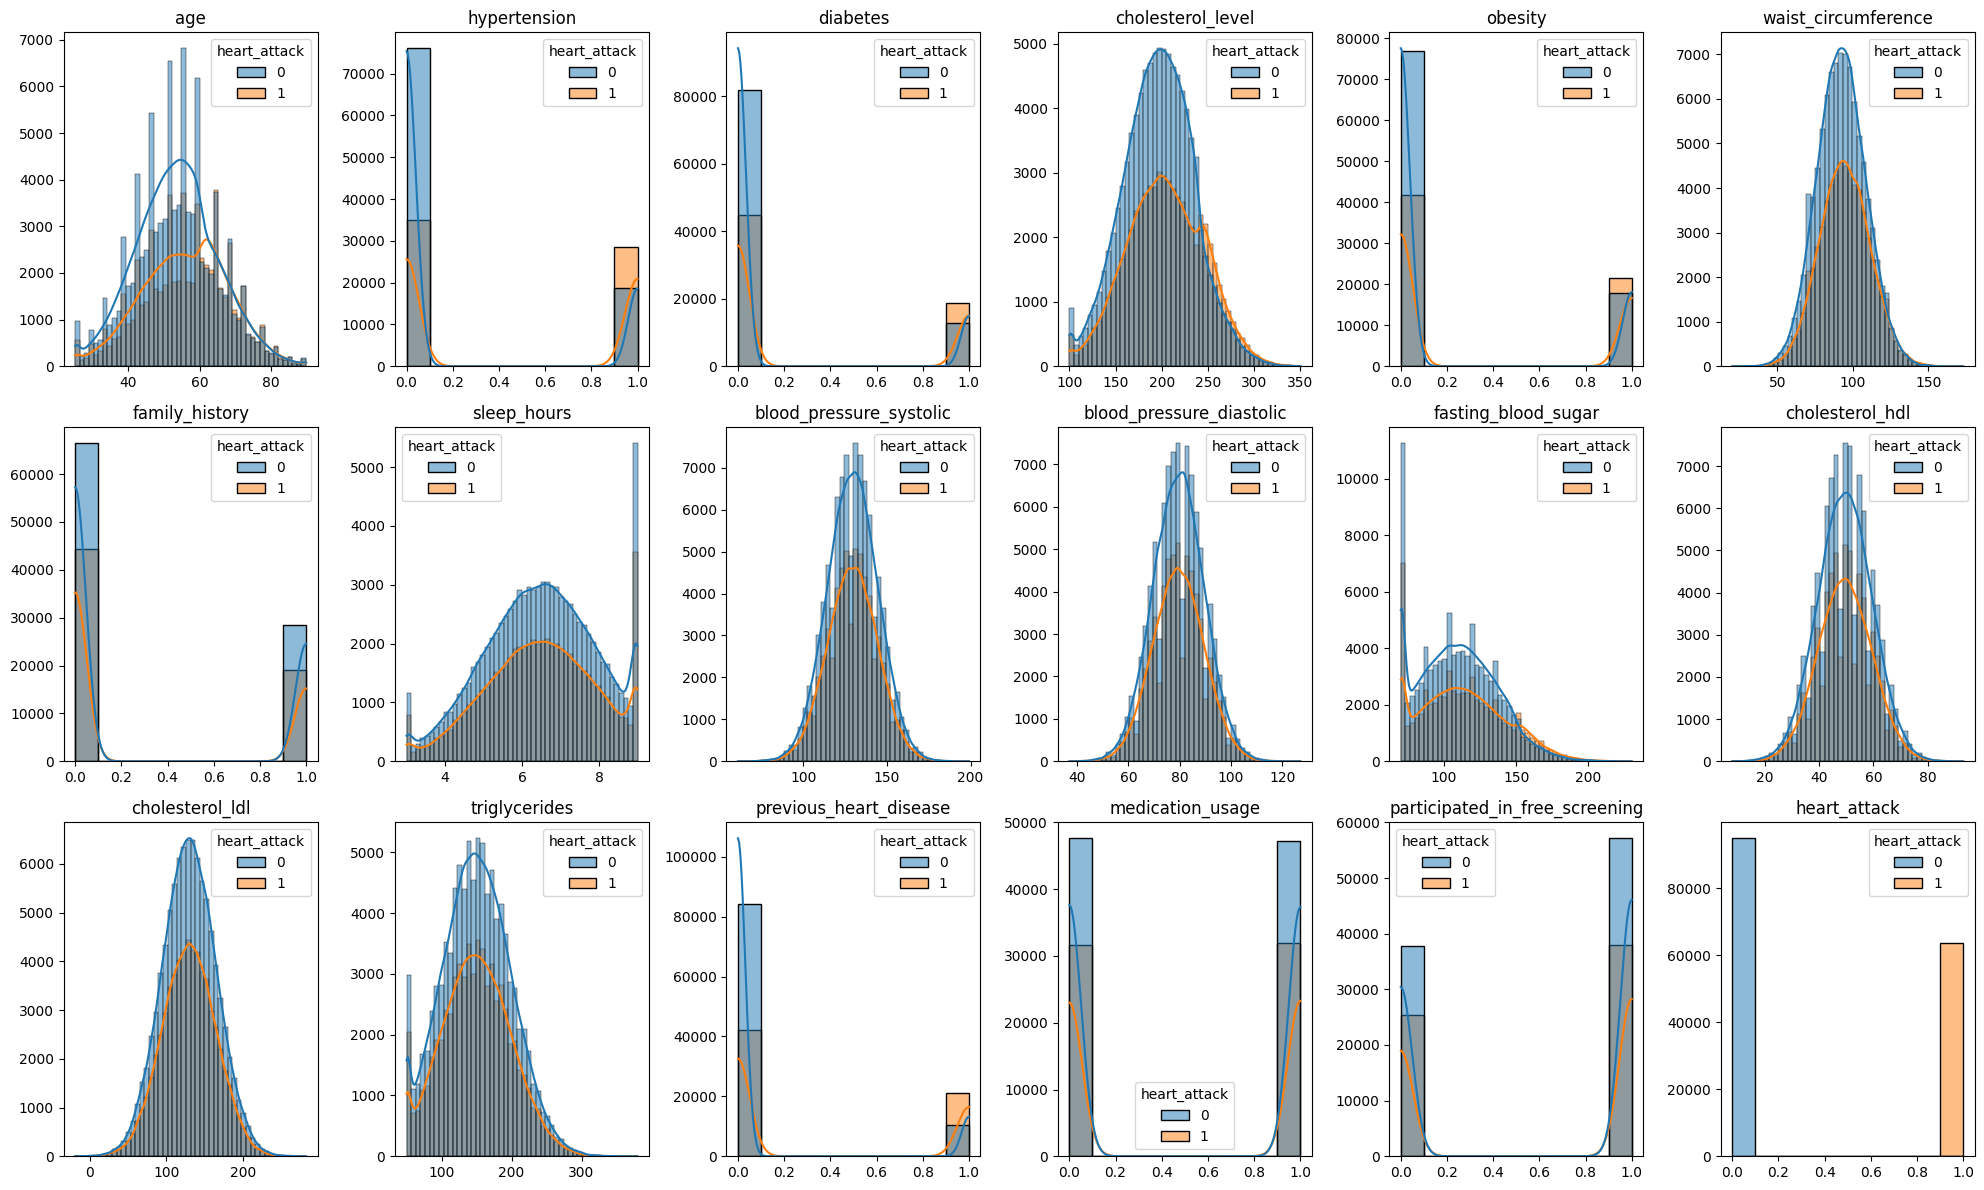

In [9]:
#graficamos las variables númericas
col_num = ['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity',
           'waist_circumference', 'family_history', 'sleep_hours',
           'blood_pressure_systolic', 'blood_pressure_diastolic',
           'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
           'triglycerides', 'previous_heart_disease', 'medication_usage',
           'participated_in_free_screening', 'heart_attack']

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
ax = ax.flatten()

for i, col in enumerate(col_num):
    nbins = 10 if df[col].nunique() <= 10 else 50
    
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True, hue= 'heart_attack')
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

# Elimina ejes vacíos si hay más subplots que variables
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


Observaciones:

La mayor parte de las personas estudiadas tienen edades entre los 55 y los 63 años.

Aproximadamente 1/3 de las personas estudiadas tienen familiares con enfermedades cardiacas.

Aproximadamente 1/5 de las personas estudiadas han tenido problemas del corazón anteriormente.

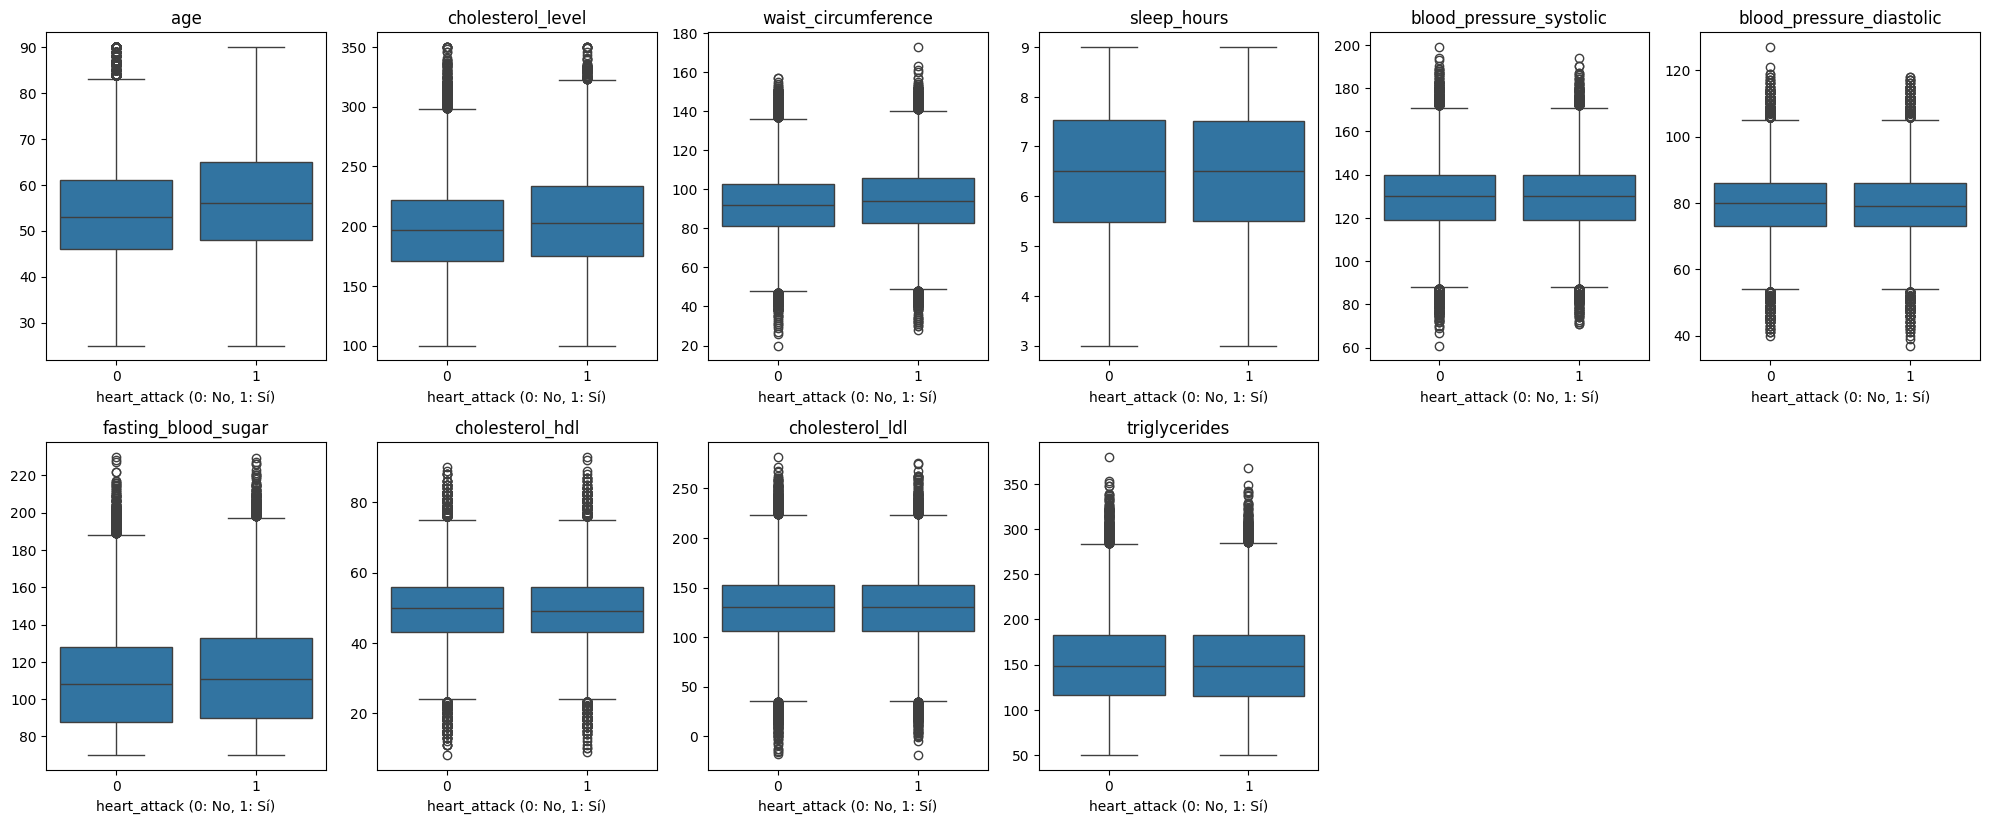

In [10]:
#relacion entre las variables numericas y la variable a predecir ('Hearth_Attack')
col_num = ['age','cholesterol_level',
           'waist_circumference', 'sleep_hours',
           'blood_pressure_systolic', 'blood_pressure_diastolic',
           'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
           'triglycerides']

# Crear subplots: 6 columnas × 3 filas
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
ax = ax.flatten()  # Aplanar el array de ejes

for i, col in enumerate(col_num):
    sns.boxplot(x='heart_attack', y=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('heart_attack (0: No, 1: Sí)')
    ax[i].set_ylabel('')

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


Observaciones:

Podemos ver que no existe alguna variable que determine más que otra si es propenso a una enfermedad cardiaca.

Podemos determinar que las personas de edad avanzada entre los 45 años y los 65 años pueden ser más propensos a una enfermedad cardiaca pero no en todos los casos.

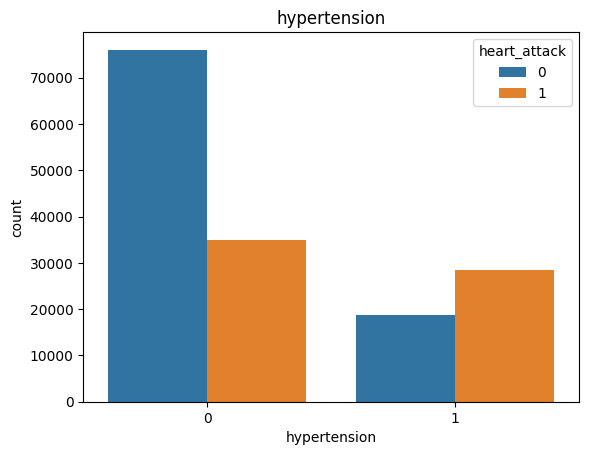

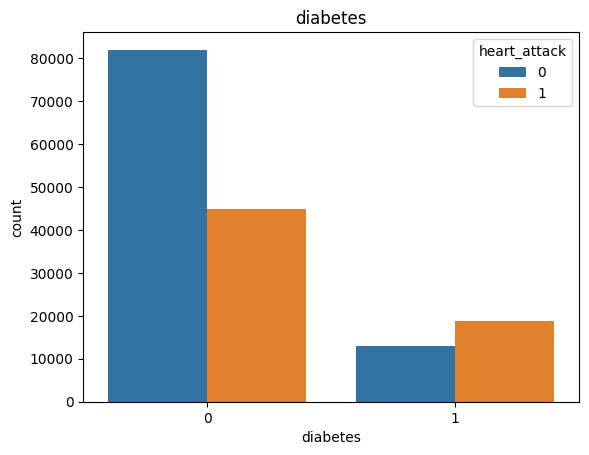

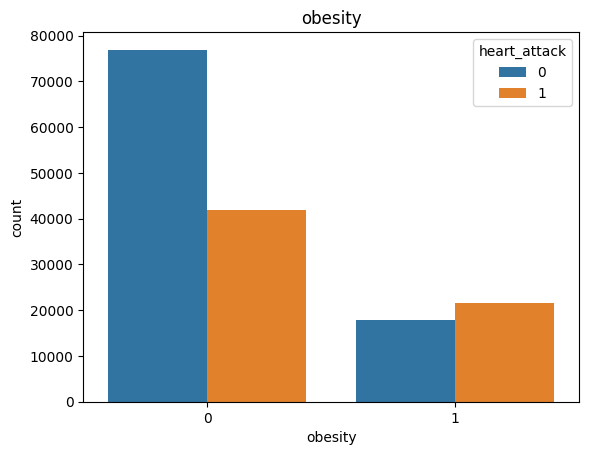

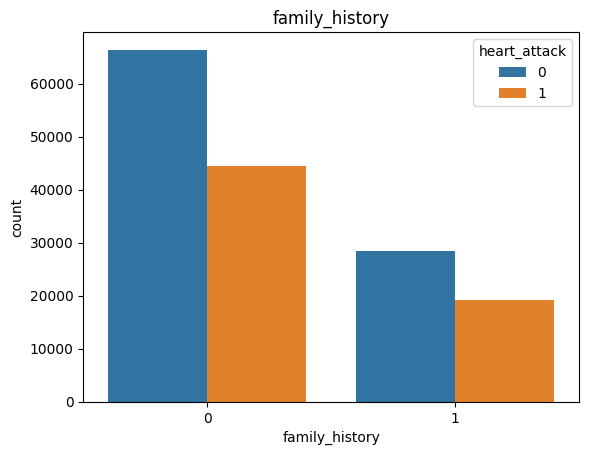

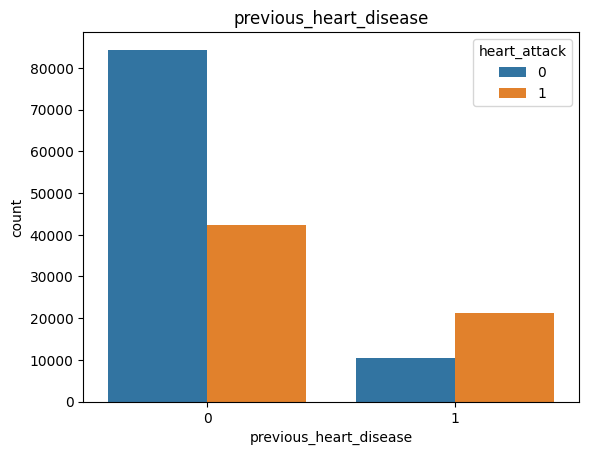

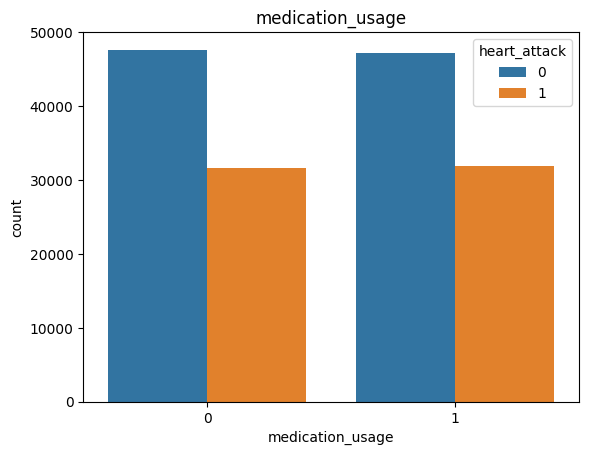

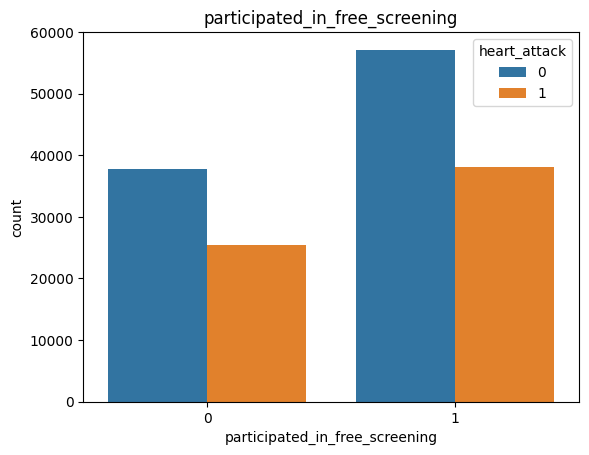

In [11]:
#relacion entre las variables binarias y la variable a predecir ('Hearth_Attack')
binary_vars = ['hypertension', 'diabetes', 'obesity', 'family_history',
               'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']

for col in binary_vars:
    sns.countplot(x=col, hue='heart_attack', data=df)
    plt.title(col)
    plt.show()


Observaciones:

'hypertension': Es uno de los mayores factores de riesgo debido a las consecuencias que nos trae en el sistema cardiovascular.

'diabetes': Es uno de los factores de riesgo debido a los problemas cardiovasculares que desencadena en el organismo.

'obesity': Concluimos que las personas con obesidad sufren de enfermedades cardiacas con mucha mas probabilidad a una que no padece de obesidad.

'family_history': No determina si sufriran de alguna enfermedad cardiaca pero si no se le da seguimiento, como mayor actividad fisica, habitos alimenticios saludables, chequeos y medicacion si se necesita. Esto puede desencadenar alguna enfermedad cardiaca.

'previous_heart_disease': Es uno de los principales factores de riesgo, si a esto le sumamos que no se han medicado y no se realizan chequeos es un riesgo mucho mayor a enfermedades cardiacas.

'medication_usage': Si una persona con una enfermedad cardiaca previa no recibe medicacion puede llegar a ser un factor de riesgo, aunque de igual forma vemos que el uso de medicamentos no los excenta enfermedades cardiacas.

'participated_in_free_screening': Podemos observar que las personas que participaron en campañas de prevension pueden ser menos propensos a enfermedades cardiacas.


Conclusión:

Hasta el momento concluimos que las variables con mayor factor de riesgo son:
'hypertension', 'diabetes', 'obesity', 'family_history'.
Debido a la vulnerabilidad que generan en nuestro organismo, si añadimos que no se les da un seguimiento y cuidado adecuado, en la mayoria de casos esto termina en problemas cardiovasculares severos.

In [12]:
#Guardamos el dataset procesado
df.to_csv("datos_heart_processed.csv", index=False)


In [13]:
#Divison de Dataset 80-20
from sklearn.model_selection import train_test_split

# Separar características (X) y etiqueta objetivo (y)
X = df.drop(columns='heart_attack')
y = df['heart_attack']

# Dividir en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
#validamos la división
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (126684, 27)
Test: (31671, 27)
